In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Load datasets
poster_path_df = pd.read_csv(r'C:\Users\dell\Desktop\MyDocs\Docs\MK\PosterPath.csv')
film_details_df = pd.read_csv(r'C:\Users\dell\Desktop\MyDocs\Docs\MK\FilmDetails.csv')
more_info_df = pd.read_csv(r'C:\Users\dell\Desktop\MyDocs\Docs\MK\MoreInfo.csv')
movies_df = pd.read_csv(r'C:\Users\dell\Desktop\MyDocs\Docs\MK\Movies.csv')

# Display the first few rows of each dataframe
poster_path_df.head(), film_details_df.head(), more_info_df.head(), movies_df.head()

(   id                                        poster_path  \
 0   1  https://image.tmdb.org/t/p/w500/9cqNxx0GxF0bfl...   
 1   2  https://image.tmdb.org/t/p/w500/3bhkrj58Vtu7en...   
 2   3  https://image.tmdb.org/t/p/w500/hek3koDUyRQk7F...   
 3   4  https://image.tmdb.org/t/p/w500/sF1U4EUQS8YHUY...   
 4   5  https://image.tmdb.org/t/p/w500/ow3wq89wM8qd5X...   
 
                                        backdrop_path  
 0  https://image.tmdb.org/t/p/w500/zfbjgQE1uSd9wi...  
 1  https://image.tmdb.org/t/p/w500/tmU7GeKVybMWFB...  
 2  https://image.tmdb.org/t/p/w500/kGzFbGhp99zva6...  
 3  https://image.tmdb.org/t/p/w500/zb6fM1CX41D9rF...  
 4  https://image.tmdb.org/t/p/w500/qqHQsStV6exghC...  ,
    id              director  \
 0   1        Frank Darabont   
 1   2  Francis Ford Coppola   
 2   3  Francis Ford Coppola   
 3   4      Steven Spielberg   
 4   5          Sidney Lumet   
 
                                           top_billed  budget_usd  revenue_usd  
 0  Tim Robbins, Mor

In [2]:
# Convert release_date to datetime
movies_df['release_date'] = pd.to_datetime(movies_df['release_date'], errors='coerce')

# Merge datasets on 'id'
merged_df = pd.merge(movies_df, film_details_df, on='id', how='left')
merged_df = pd.merge(merged_df, more_info_df, left_on='id', right_on='film_id', how='left')

# Drop duplicates and unnecessary columns
merged_df.drop(columns=['film_id'], inplace=True)
merged_df.drop_duplicates(inplace=True)

# Handle missing values
merged_df.fillna({'budget_usd': 0, 'revenue_usd': 0, 'runtime': '0'}, inplace=True)

# Convert runtime to integer
merged_df['runtime'] = merged_df['runtime'].str.extract('(\d+)').astype(int)

merged_df.head()

,id_x,title,genres,language,user_score,runtime_hour,runtime_min,release_date,vote_count,director,top_billed,budget_usd,revenue_usd,id_y,runtime,budget,revenue
0,1,The Shawshank Redemption,"Drama, Crime",en,8.7,2,22,1994-09-23,27070,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",25000000.0,28341469.0,1,2,"$25,000,000","$28,341,469"
1,2,The Godfather,"Drama, Crime",en,8.7,2,55,1972-03-14,20563,Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Robert D...",6000000.0,245066411.0,2,2,"$6,000,000","$245,066,411"
2,3,The Godfather Part II,"Drama, Crime",en,8.6,3,22,1974-12-20,12403,Francis Ford Coppola,"Al Pacino, Robert Duvall, Diane Keaton, Robert...",13000000.0,102600000.0,3,3,"$13,000,000","$102,600,000"
3,4,Schindler's List,"Drama, History, War",en,8.6,3,15,1993-12-15,15810,Steven Spielberg,"Liam Neeson, Ben Kingsley, Ralph Fiennes, Caro...",22000000.0,321365567.0,4,3,"$22,000,000","$321,365,567"
4,5,12 Angry Men,Drama,en,8.5,1,37,1957-04-10,8611,Sidney Lumet,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",397751.0,4360000.0,5,1,"$397,751","$4,360,000"


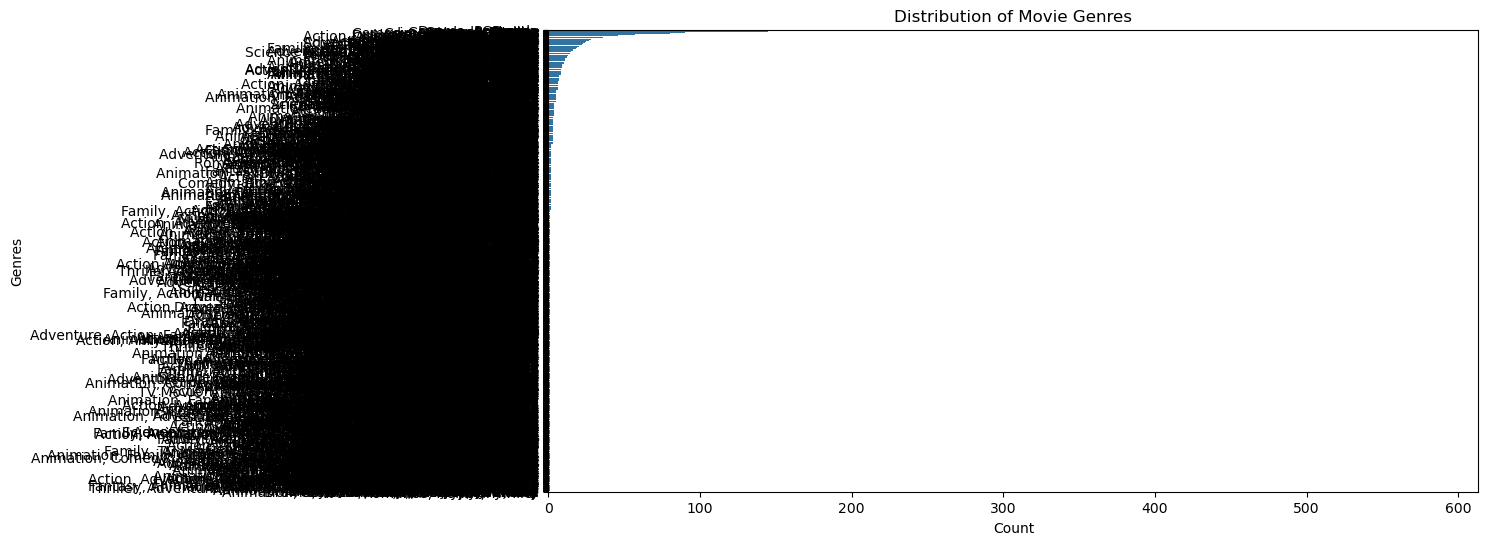

In [3]:
# Distribution of movie genres
plt.figure(figsize=(12, 6))
sns.countplot(y='genres', data=merged_df, order=merged_df['genres'].value_counts().index)
plt.title('Distribution of Movie Genres')
plt.xlabel('Count')
plt.ylabel('Genres')
plt.show()

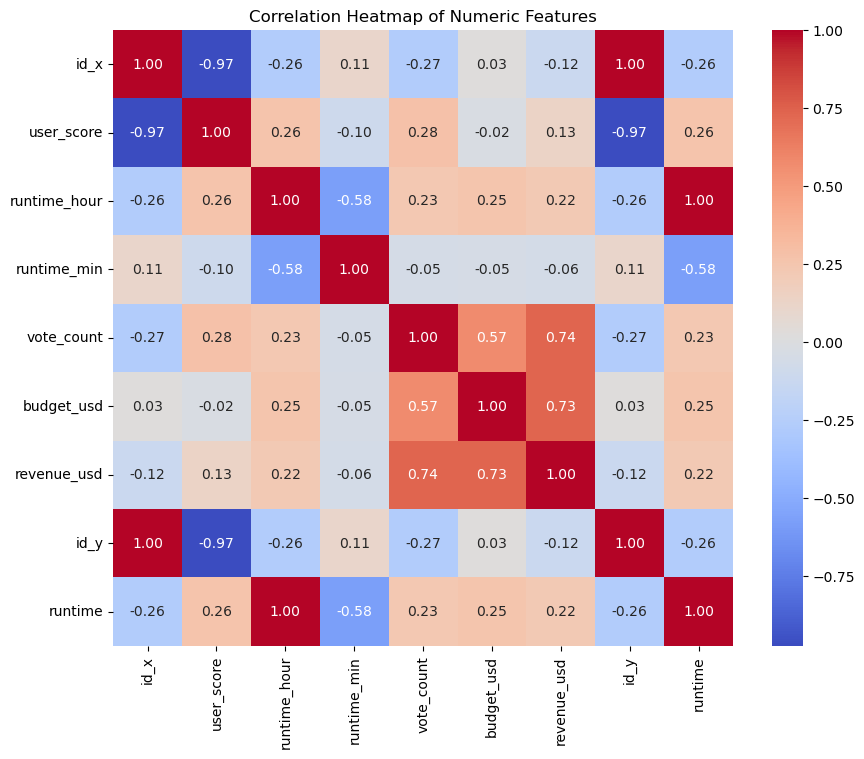

In [4]:
# Correlation heatmap for numeric features
numeric_df = merged_df.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

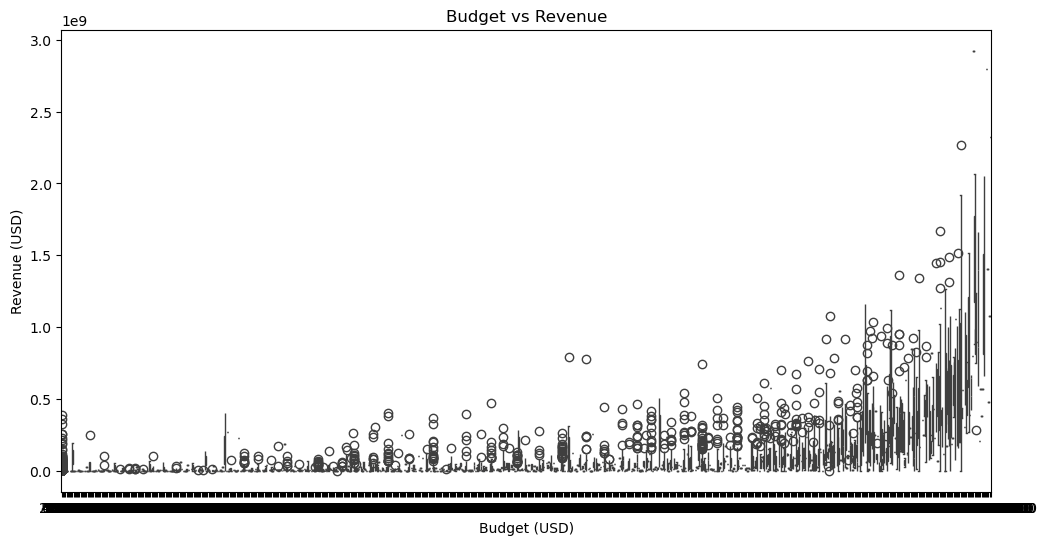

In [5]:
# Box plot of budget vs revenue
plt.figure(figsize=(12, 6))
sns.boxplot(x='budget_usd', y='revenue_usd', data=merged_df)
plt.title('Budget vs Revenue')
plt.xlabel('Budget (USD)')
plt.ylabel('Revenue (USD)')
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Prepare data for modeling
features = ['budget_usd', 'runtime', 'vote_count']
X = merged_df[features]
y = merged_df['user_score']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse


0.7600850232832714